# 03 - Baseline Model

Since we have a multiclass classification we can use a simple Logistic regression to have a start point.

In this notebook we are going to build a logistic regression model with our dataset (using only a grayscale chanel) :

### Steps: 
 - Importing/accessing the data;
 - Separeting the Train and Test Data;
 - (Upload and Donwload the model in case you just want to evaluete);
 - Fit the model (in this case, train the logistic regression);
 - Evaluete the model;
    - Accuracy, Precision, Recall, f1
    - Confusion Matrix 
    - 
 - Using the model to predict the specifics images

## Importing/accessing the data

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dataset_directory = '../datasets/dataset_normal/'

# Load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for label, folder in enumerate(os.listdir(directory)):
        for filename in os.listdir(os.path.join(directory, folder)):
            img = cv2.imread(os.path.join(directory, folder, filename))
            img = cv2.resize(img, (100, 100))  # Resize image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            images.append(img.flatten())  # Flatten image
            labels.append(label)
    return np.array(images), np.array(labels)

# Feature extraction
images, labels = load_images(dataset_directory)

# Feature scaling (optional but recommended)
images = images / 255.0  # Scale pixel values to range [0, 1]


In [2]:
images.shape
# labels

(17092, 10000)

## Separeting the Train and Test Data

In [3]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


## (Upload and Donwload the model in case you just want to evaluete)

In [7]:
# ATENTION !!

import joblib

# Save the model
# joblib.dump(logreg, 'logistic_regression_model.pkl')

# Load the model
logreg = joblib.load('../models/logistic_regression_model.pkl')
result = logreg.score(X_test, y_test)
print(result)

0.6063176367358877


## Fit the model (in this case, train the logistic regression)

In [25]:
# Training logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)


/Users/ottospigariol/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [8]:
# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.9929057266144957
Test score: 0.6063176367358877


## Evaluete the model

In [30]:
# Evaluate the model
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6063176367358877


### Accuracy, Precision, Recall, f1

In [10]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.44      0.38      0.41       237
           1       0.67      0.68      0.68       661
           2       0.43      0.44      0.43       579
           3       0.37      0.31      0.34       308
           4       0.58      0.59      0.59       624
           5       0.58      0.65      0.61       296
           6       0.69      0.66      0.68       250
           7       0.97      0.97      0.97       464

    accuracy                           0.61      3419
   macro avg       0.59      0.59      0.59      3419
weighted avg       0.60      0.61      0.60      3419



### Confusion Matrix 

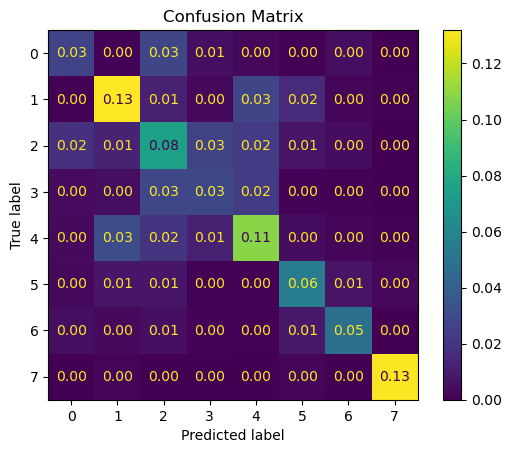

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all', values_format='.2f')
plt.title('Confusion Matrix')
plt.show()


### One-vs-Rest (OvR) multiclass ROC

More information at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [16]:
from sklearn.preprocessing import LabelBinarizer

# use a LabelBinarizer to binarize the target by one-hot-encoding in a OvR fashion. This means that the target of shape (n_samples,) is mapped to a target of shape (n_samples, n_classes).

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)


(3419, 8)

In [24]:
#check the encoding of a specific class:
label_binarizer.transform([1])


array([[0, 1, 0, 0, 0, 0, 0, 0]])

In [101]:
#ROC curve showing a specific class

class_of_interest = 6
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id


6

In [266]:
cells = {
    0 : 'basophil',
    1 : 'eosinophil',
    2 : 'erythroblast',
    3 : 'ig',
    4 : 'lymphocyte',
    5 : 'monocyte',
    6 : 'neutrophil',
    7 : 'platelet',
}

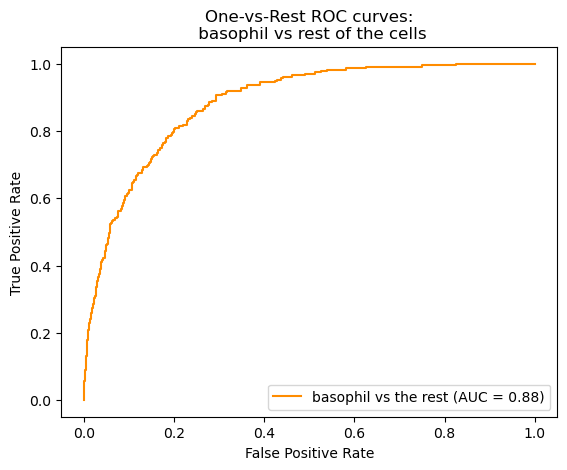

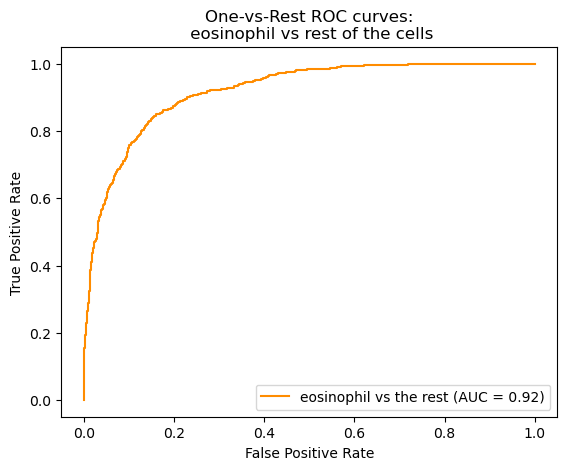

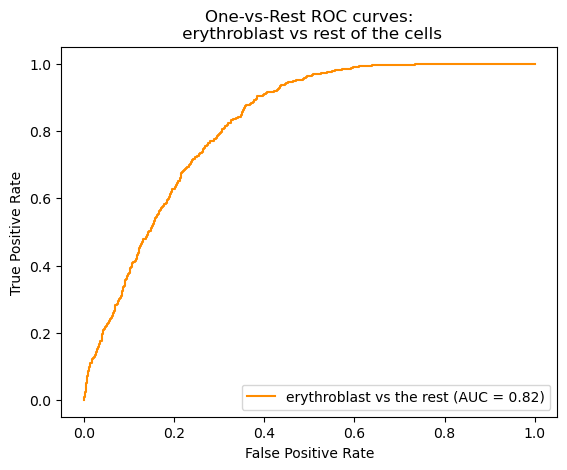

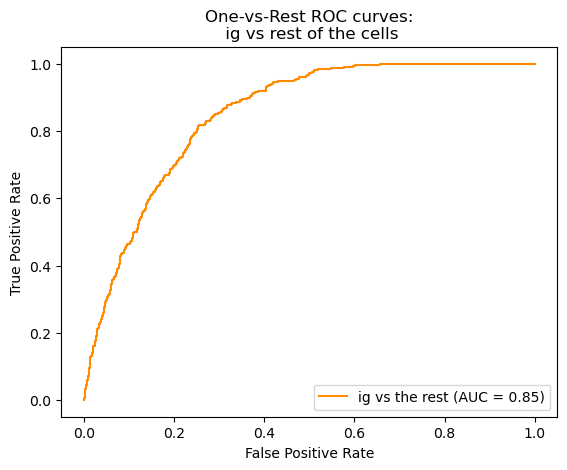

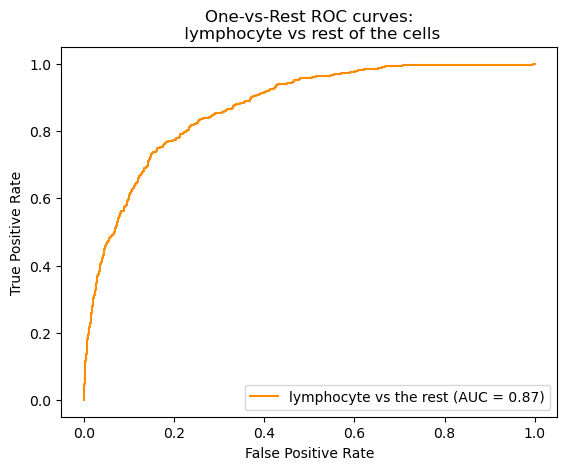

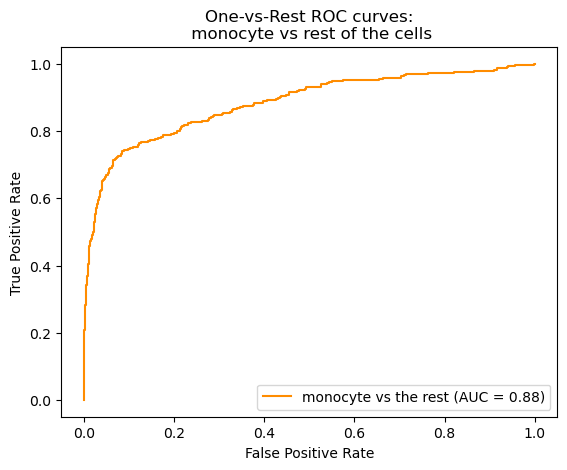

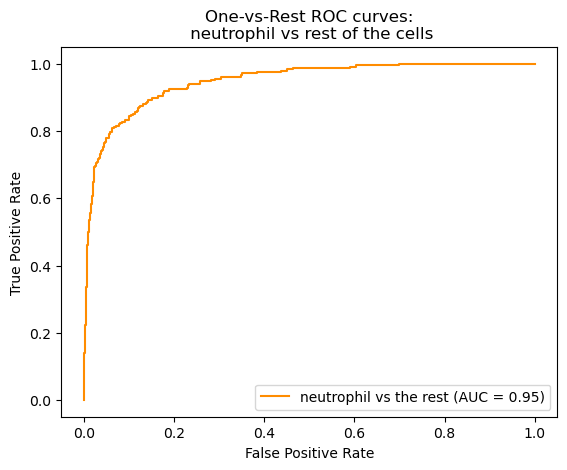

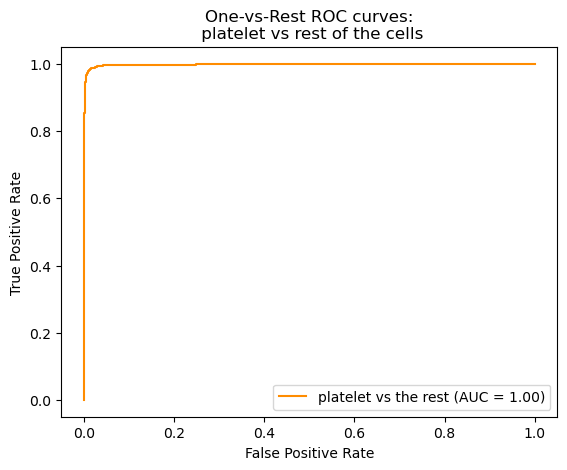

In [270]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

y_score = logreg.predict_proba(X_test)
# y_score= (logreg.predict_proba(X_test)[:, class_id] >= 0.9).astype(int) 
# print(y_pred_new_threshold)
for i in range(0,8):
    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],
        y_score[:, i],
        name=f"{cells[i]} vs the rest",
        color="darkorange",
        # plot_chance_level=True,
    )
    _ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title='One-vs-Rest ROC curves:\n {} vs rest of the cells'.format(cells[i]),
)

# display = RocCurveDisplay.from_predictions(
#     y_onehot_test[:, class_id],
#     y_score[:, class_id],
#     name=f"{class_of_interest} vs the rest",
#     color="darkorange",
#     # plot_chance_level=True,
# )
# _ = display.ax_.set(
#     xlabel="False Positive Rate",
#     ylabel="True Positive Rate",
#     title="One-vs-Rest ROC curves:\n Neutrophil vs rest of the cells",
# )


In [260]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_proba = logreg.predict_proba(X_test)
#macro-averaging
auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
roc_auc_score
print("Área sob a curva ROC:", auc_roc)


Área sob a curva ROC: 0.8966408340042076


In [52]:
# With this cell, can see the absolut numbers in the confusion matrix
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_pred)


## Using the model to predict the specifics images

In [14]:
filename = '../datasets/dataset_normal/basophil/BA_47.jpg'
# filename = '../datasets/dataset_normal/neutrophil/BNE_715.jpg'

cells = {
    0 : 'basophil',
    1 : 'eosinophil',
    2 : 'erythroblast',
    3 : 'ig',
    4 : 'lymphocyte',
    5 : 'monocyte',
    6 : 'neutrophil',
    7 : 'platelet',
}

img = cv2.imread(os.path.join(filename))
img = cv2.resize(img, (100, 100))  # Resize image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
X = img.flatten()  # Flatten image
X = X / 255.0  

result = logreg.predict([X])
print(f"The cell that was detect was: {cells[result[0]]}")

The cell that was detect was: basophil
